# <span style="color: green; font-size: 40px; font-weight: bold;"> Projeto 2 (Classificação) </span>

<br><br>

# Classificação de Fraude em Transações Bancárias

<br><br>

### Contexto

- Um banco está preocupado com o aumento de fraudes em transações bancárias e quer usar um modelo de classificação para identificar transações fraudulentas.
- O **objetivo** é proteger os clientes e minimizar as perdas financeiras devido a fraudes.

<br>

### Problema de Negócio
- Como podemos identificar se uma transação bancária é fraudulenta ou não com base em suas características?

<br>

### Sobre o Conjunto de Dados

O conjunto de dados simulado terá 10.000 linhas e incluirá as seguintes colunas:

<br>

<table border="2">
  <tr>
    <th style="text-align: center; font-size: 16px;">Nome da Coluna</th>
    <th style="text-align: center; font-size: 16px;">Tipo de Dado</th>
    <th style="text-align: center; font-size: 16px;">Descrição</th>
  </tr>
  <tr>
    <td>transaction_id</td>
    <td>str</td>
    <td>Identificação única da transação.</td>
  </tr>
  <tr>
    <td>account_age</td>
    <td>int</td>
    <td>Idade da conta em meses.</td>
  </tr>
  <tr>
    <td>transaction_amount</td>
    <td>float</td>
    <td>Valor da transação em reais.</td>
  </tr>
  <tr>
    <td>transaction_type</td>
    <td>str</td>
    <td>Tipo de transação (compra, transferência, saque).</td>
  </tr>
  <tr>
    <td>location</td>
    <td>str</td>
    <td>Localização da transação.</td>
  </tr>
  <tr>
    <td>is_fraud</td>
    <td>int</td>
    <td>Indicador se a transação é fraudulenta (1) ou não (0).</td>
  </tr>
</table>

<br><br>

### Perguntas de Negócio Adicionais:

- Quais padrões de localização estão associados a transações fraudulentas?

> Analisando a localização das transações, podemos identificar se fraudes ocorrem mais frequentemente em determinadas áreas geográficas. Isso pode ajudar a detectar atividades suspeitas em regiões específicas e implementar medidas de segurança mais eficazes.

- Como o valor da transação e o tipo de transação influenciam a probabilidade de fraude?

> Investigando a relação entre o valor da transação e seu tipo (compra, transferência, saque), podemos identificar combinações que são mais susceptíveis a fraudes. Isso permitirá ao banco criar alertas específicos para transações de alto risco.

<br><br>

## Importando Pacotes

In [1]:
# Manipulação de Dados
import numpy as np
import pandas as pd

# Criação e Visualização de Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Carrega a função SMOTE (Balanceamento de Classes)
from imblearn.over_sampling import SMOTE

# Label Enconding
from sklearn.preprocessing import LabelEncoder

# Pacote do Python para Machine Learning
import sklearn

# Função model_selection do pacote sklearn
from sklearn.model_selection import train_test_split    # dividir os dados em treino e teste
from sklearn.model_selection import GridSearchCV        # técnica de utilização de hiperparâmetros
from sklearn.model_selection import RandomizedSearchCV  # técnica de utilização de hiperparâmetros
from sklearn.model_selection import cross_val_score     # validação cruzada (para avaliação do modelo)

# Padronização
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pacotes do sklearn com os Algoritmos

# Função com Algoritmo de ML (Regressão Logística)
from sklearn.linear_model import LogisticRegression     

# Função com Algoritmo de ML (RandomForest)
from sklearn.ensemble import RandomForestClassifier

# Função com Algoritmo de ML (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Função com Algoritmo de ML (Árvores de Decisão)
from sklearn.tree import DecisionTreeClassifier

# Função com Algoritmo de ML (SVC)
from sklearn.svm import SVC

# Função com Algoritmo de ML (GBM)
from sklearn.ensemble import GradientBoostingClassifier

# Função com Algoritmo de ML (AdaBoost)
from sklearn.ensemble import AdaBoostClassifier

# Função com Algoritmo de ML (LGBMClassifier)
from lightgbm import LGBMClassifier 

# Calcular as Métricas para Avaliação dos Modelos
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score

# Salvar o modelo após o treinamento
import joblib
import pickle

# Indicando que os Gráficos apareçam no Jupyter Notebook
%matplotlib inline

# Mensagens de Aviso
import warnings
warnings.filterwarnings("ignore")

<br><br>

## Carregando Conjunto de Dados

In [2]:
# Carrega o dataset
dados = pd.read_csv('dados/transacoes_bancarias_ajustado.csv')

In [3]:
# Visualiza
dados.head()

,transaction_id,account_age,transaction_amount,transaction_type,location,is_fraud
0,TX0,111.0,118.087401,transferência,online,0
1,TX1,144.0,89.681117,transferência,fisico,0
2,TX2,125.0,14.275808,compra,fisico,0
3,TX3,173.0,NaN,transferência,online,1
4,TX4,16.0,462.077119,transferência,fisico,0


In [4]:
# Info
dados.info()

# Verifica se há valores ausentes e duplicados
valores_ausentes = dados.isna().sum().sum() > 0
valores_duplicados = dados.duplicated().sum() > 0

# Nomes das variáveis com valores ausentes
variaveis_ausentes = dados.columns[dados.isna().any()].tolist()

# Nomes das variáveis com valores duplicados (dados duplicados nas linhas inteiras)
variaveis_duplicadas = "Todas as variáveis" if valores_duplicados else "Nenhuma variável"

# Exibe o resultado
print(f"\n\nExistem valores ausentes: {valores_ausentes}")
if valores_ausentes:
    print(f"Variáveis com valores ausentes: {variaveis_ausentes}")
else:
    print("Nenhuma variável possui valores ausentes.")

print(f"Existem valores duplicados: {valores_duplicados}")
if valores_duplicados:
    print(f"Variáveis com valores duplicados: {variaveis_duplicadas}")
else:
    print("Nenhuma variável possui valores duplicados.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      11000 non-null  object 
 1   account_age         10450 non-null  float64
 2   transaction_amount  10450 non-null  float64
 3   transaction_type    11000 non-null  object 
 4   location            11000 non-null  object 
 5   is_fraud            11000 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 515.8+ KB


Existem valores ausentes: True
Variáveis com valores ausentes: ['account_age', 'transaction_amount']
Existem valores duplicados: True
Variáveis com valores duplicados: Todas as variáveis


<br>

### Ordem Recomendada das Etapas de Pré-Processamento:

- **Realizar Análise Exploratória** - Realizar Análise Exploratória das Variáveis Numéricas e Categóricas
- **Transformação de Variáveis Categóricas**: Converter variáveis categóricas em numéricas.
- **Tratamento de Valores Ausentes**: Lidar com valores ausentes primeiro garante que as próximas etapas possam ser aplicadas a um conjunto de dados completo e correto.
- **Tratamento de Outliers**: Identificar e tratar outliers evita que esses valores influenciem negativamente as transformações e modelagens subsequentes.
- **Verificação de Correlação**: Avaliar a correlação entre as variáveis para entender suas relações e evitar multicolinearidade.
- **Divisão em Conjuntos de Treino e Teste**: Separar os dados em conjuntos de treino e teste antes de aplicar técnicas de modelagem.
- **Escalonamento de Dados**: Normalizar ou padronizar os dados para garantir que todas as variáveis estejam na mesma escala, especialmente importante para modelos baseados em distância.

<br><br>
## Análise Exploratória de Dados

In [5]:
# Nome das colunas
dados.columns

Index(['transaction_id', 'account_age', 'transaction_amount',
       'transaction_type', 'location', 'is_fraud'],
      dtype='object')

In [6]:
# Visualiza dados
dados.head(3)

,transaction_id,account_age,transaction_amount,transaction_type,location,is_fraud
0,TX0,111.0,118.087401,transferência,online,0
1,TX1,144.0,89.681117,transferência,fisico,0
2,TX2,125.0,14.275808,compra,fisico,0


#### Visualizando Variáveis Categóricas e Numéricas

In [7]:
# Exibindo Variáveis Categóricas (filtrando)
dados.dtypes[dados.dtypes == 'object']

transaction_id      object
transaction_type    object
location            object
dtype: object

In [8]:
# Exibindo Variáveis Numéricas (filtrando)
dados.dtypes[dados.dtypes != 'object']

account_age           float64
transaction_amount    float64
is_fraud                int64
dtype: object

<br><br>

## Explorando Variáveis Numéricas

#### Resumo Estatístico

In [9]:
dados.describe()

,account_age,transaction_amount,is_fraud
count,10450.000000,10450.000000,11000.000000
mean,118.555789,201.700745,0.372636
std,69.205149,201.456500,0.483528
min,1.000000,0.002615,0.000000
25%,58.000000,57.851640,0.000000
50%,117.000000,138.640492,0.000000
75%,179.000000,280.274938,1.000000
max,239.000000,1840.540635,1.000000


#### Visualizando através de Gráficos

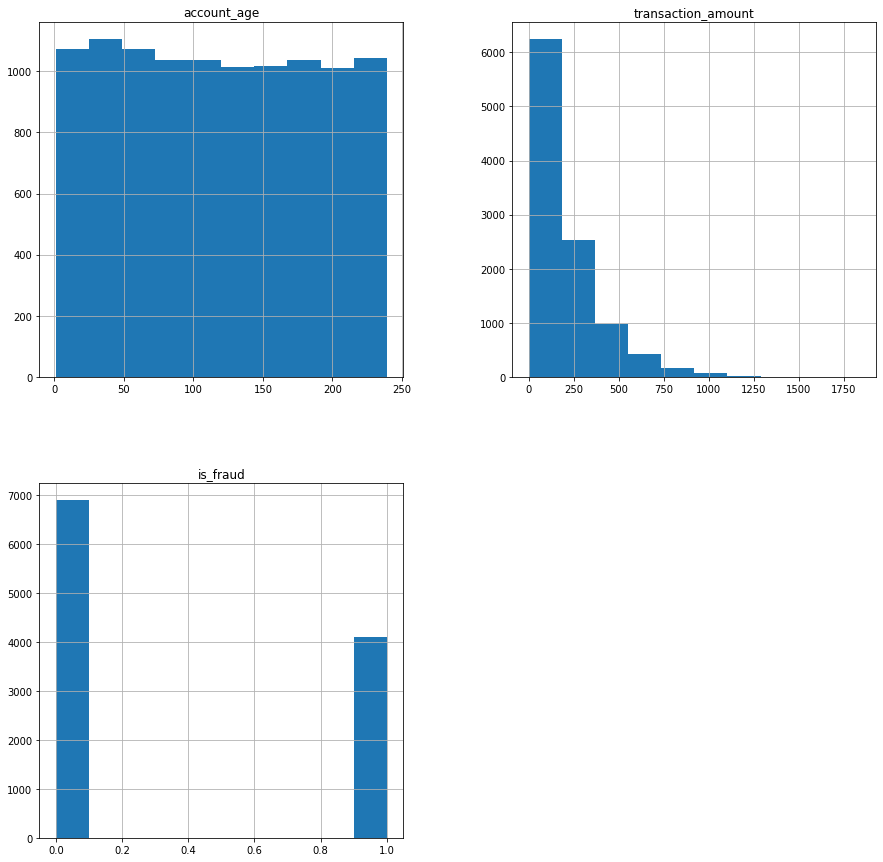

In [10]:
# Plot
dados.hist(figsize = (15,15), bins = 10) 
plt.show()

#### Interpretando o Resumo e Gráficos

- **account_age**: A variável "account_age" está bem distribuída e não apresenta muitos outliers. Isso indica que a idade das contas é uma variável estável e pode ser usada diretamente nos modelos de machine learning.
- **transaction_amount**: A variável "transaction_amount" possui uma distribuição assimétrica com uma cauda longa à direita, indicando a presença de outliers. Será necessário considerar técnicas para lidar com esses outliers, como a transformação dos dados ou a utilização de técnicas robustas a outliers.
- **is_fraud**: A variável "is_fraud" é desbalanceada, o que pode afetar a performance dos modelos de machine learning. Técnicas de balanceamento, como a sobremostragem da classe minoritária ou a subamostragem da classe majoritária, devem ser consideradas para melhorar a capacidade dos modelos em identificar transações fraudulentas.

#### Conclusão:

- As variáveis "account_age" está bem distribuída e estável, "transaction_amount" apresenta outliers significativos, e "is_fraud" é altamente desbalanceada, exigindo técnicas de balanceamento para melhorar a detecção de fraudes.

<br>

### Verificando value_counts da variável alvo

In [11]:
dados['is_fraud'].value_counts()

is_fraud
0    6901
1    4099
Name: count, dtype: int64

<br><br>

## Explorando Variável Categórica

#### Resumo Estatístico

In [12]:
# Describe (informando que é para somente variáveis categóricas)
dados.describe(include = ['object'])

,transaction_id,transaction_type,location
count,11000,11000,11000
unique,10000,3,2
top,TX5269,transferência,fisico
freq,2,3708,5519


In [13]:
# Verificando Tipo das Variáveis
print(dados['transaction_id'].unique())
print(dados['transaction_type'].unique())
print(dados['location'].unique())

['TX0' 'TX1' 'TX2' ... 'TX9997' 'TX9998' 'TX9999']
['transferência' 'compra' 'saque']
['online' 'fisico']


In [14]:
# Verificando value_counts das Variáveis
print(dados['transaction_type'].value_counts())
print(dados['location'].value_counts())

transaction_type
transferência    3708
compra           3659
saque            3633
Name: count, dtype: int64
location
fisico    5519
online    5481
Name: count, dtype: int64


#### Visualizando através de Gráfico

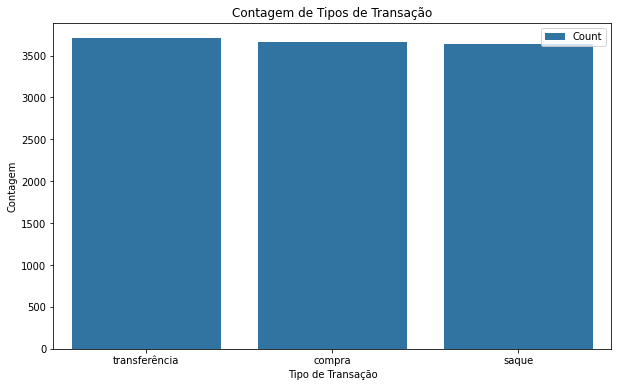

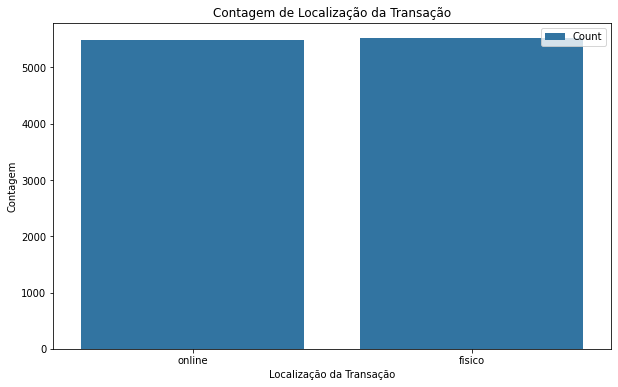

Contagem de tipos de transação:
Tipo de transação transferência: 3708
Tipo de transação compra: 3659
Tipo de transação saque: 3633

Contagem de localização da transação:
Localização fisico: 5519
Localização online: 5481


In [15]:
# Exibindo o gráfico de contagem para 'transaction_type'
plt.figure(figsize=(10, 6))
sns.countplot(data=dados, x='transaction_type', label='Count')
plt.title('Contagem de Tipos de Transação')
plt.xlabel('Tipo de Transação')
plt.ylabel('Contagem')
plt.show()

# Exibindo o gráfico de contagem para 'location'
plt.figure(figsize=(10, 6))
sns.countplot(data=dados, x='location', label='Count')
plt.title('Contagem de Localização da Transação')
plt.xlabel('Localização da Transação')
plt.ylabel('Contagem')
plt.show()

# Value counts for 'transaction_type'
transaction_type_counts = dados['transaction_type'].value_counts()
print("Contagem de tipos de transação:")
for transaction_type, count in transaction_type_counts.items():
    print(f'Tipo de transação {transaction_type}: {count}')

# Value counts for 'location'
location_counts = dados['location'].value_counts()
print("\nContagem de localização da transação:")
for location, count in location_counts.items():
    print(f'Localização {location}: {count}')

<br>

## Removendo Variável transaction_id

In [16]:
# Shape
print(dados.shape)

# Removendo a variável transaction_id
dados = dados.drop('transaction_id', axis=1)

# Verificando as primeiras linhas do dataframe após a remoção
print(dados.head(2))

# Shape
print(dados.shape)

(11000, 6)
   account_age  transaction_amount transaction_type location  is_fraud
0        111.0          118.087401    transferência   online         0
1        144.0           89.681117    transferência   fisico         0
(11000, 5)


<br>

## Aplicando Label Encoding
#### Vamos transformar as variáveis **Categóricas** transaction_type e location na sua represetação **Numérica**

In [17]:
dados.columns

Index(['account_age', 'transaction_amount', 'transaction_type', 'location',
       'is_fraud'],
      dtype='object')

In [18]:
dados.sample(10)

,account_age,transaction_amount,transaction_type,location,is_fraud
3624,147.0,271.471775,compra,fisico,0
9839,108.0,60.641415,compra,online,1
5690,203.0,79.275814,saque,fisico,0
5998,145.0,87.463050,transferência,fisico,0
10763,64.0,130.232007,saque,online,0
2465,114.0,229.506658,saque,fisico,0
2090,49.0,890.146424,compra,fisico,1
3403,109.0,52.091338,compra,fisico,1
2232,203.0,115.232376,saque,online,0
6529,44.0,35.204207,saque,fisico,1


In [19]:
# Inicializando os label encoders
le_transaction_type = LabelEncoder()
le_location = LabelEncoder()

# Aplicando label encoding às variáveis categóricas
dados['transaction_type'] = le_transaction_type.fit_transform(dados['transaction_type'])
dados['location'] = le_location.fit_transform(dados['location'])

In [20]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   account_age         10450 non-null  float64
 1   transaction_amount  10450 non-null  float64
 2   transaction_type    11000 non-null  int64  
 3   location            11000 non-null  int64  
 4   is_fraud            11000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 429.8 KB


In [21]:
dados.sample(10)

,account_age,transaction_amount,transaction_type,location,is_fraud
5523,214.0,212.284665,0,1,0
3073,183.0,9.067776,2,1,0
1493,52.0,75.972414,0,0,1
10260,181.0,1570.140599,1,1,0
7762,184.0,NaN,0,1,1
5655,15.0,208.911593,0,1,0
5204,40.0,168.264550,2,0,0
6998,162.0,201.653995,0,0,1
10088,155.0,326.831522,2,1,0
10690,162.0,832.186857,0,1,1


<br>

# Limpeza nos Dados

<br>

### Tratando Valores Ausentes

In [22]:
# Verifica se há valores ausentes (por coluna)
dados.isna().sum()

account_age           550
transaction_amount    550
transaction_type        0
location                0
is_fraud                0
dtype: int64

In [23]:
# Shape
print(dados.shape)

# Eliminando as linhas com valores ausentes
dados = dados.dropna()


# Verifica se há valores ausentes (por coluna)
dados.isna().sum()

# Shape
print(dados.shape)

(11000, 5)
(9923, 5)


<br>

## Tratando Valores Duplicados

In [24]:
# Shape
print(dados.shape)

# Verifica quantidade de valores duplicados
print(dados.duplicated().sum())

(9923, 5)
834


In [25]:
# Remove registros duplicados (remove uma das duplicatas)
dados = dados.drop_duplicates()

# Shape
print(dados.shape)

(9089, 5)


<br>

## Tratando Valores Outliers

- Conforme dito acima, vamos olhar para a variável **transaction_amount**.

In [26]:
# Describe
print(dados['transaction_amount'].describe())

print(dados.shape)

count    9089.000000
mean      201.513092
std       199.961979
min         0.004513
25%        58.634359
50%       139.097082
75%       279.914838
max      1840.540635
Name: transaction_amount, dtype: float64
(9089, 5)


<Axes: ylabel='transaction_amount'>

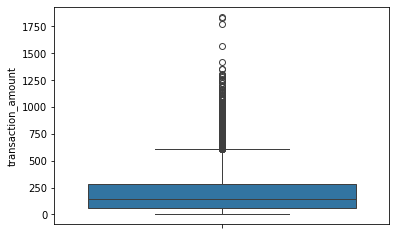

In [27]:
# Boxplot
sns.boxplot(dados.transaction_amount)

In [28]:
# Exibindo a quantidade de valores acima da média:

# Cálculo da média
media = dados['transaction_amount'].mean()

# Contagem de valores acima da média
total_acima_media = (dados['transaction_amount'] > media).sum()

print("Total de valores acima da média:", total_acima_media)

# Quantidade de valores acima de 1400
acima_1400 = (dados['transaction_amount'] > 1400).sum()
print(f"Quantidade de valores acima de 1500: {acima_1400}")

print("Total de valores na variável:", len(dados['transaction_amount']))

Total de valores acima da média: 3352
Quantidade de valores acima de 1500: 5
Total de valores na variável: 9089


#### Removendo Valores Acima de 1400

In [29]:
# Removendo valores acima de 1400
dados = dados[dados['transaction_amount'] <= 1400]

# Verificando o resultado
print(dados['transaction_amount'].describe())

count    9084.000000
mean      200.696473
std       196.924816
min         0.004513
25%        58.582575
50%       138.989039
75%       279.734666
max      1355.685459
Name: transaction_amount, dtype: float64


<Axes: ylabel='transaction_amount'>

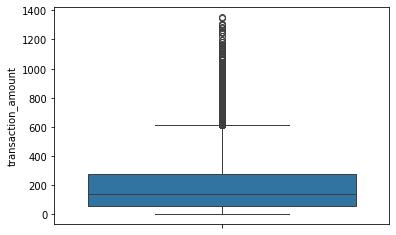

In [30]:
# Boxplot
sns.boxplot(dados.transaction_amount)

In [31]:
# Describe
print(dados['transaction_amount'].describe())

print(dados.shape)

count    9084.000000
mean      200.696473
std       196.924816
min         0.004513
25%        58.582575
50%       138.989039
75%       279.734666
max      1355.685459
Name: transaction_amount, dtype: float64
(9084, 5)


### Conclusão
- O objetivo do tratamento de outliers foi reduzir o impacto de valores extremos na variável "transaction_amount" para melhorar a qualidade dos modelos de machine learning e garantir que os resultados sejam representativos da maioria das transações no conjunto de dados.
- Remoção de Valores Acima de 1400: Transações com valores acima de 1400 representavam 5 casos. Esses valores são mais altos que a média e o desvio padrão, mas sua remoção adicional ajuda a garantir que a modelagem seja ainda mais robusta contra outliers.

<br>

## Verificando Correlação

In [32]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9084 entries, 0 to 10995
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   account_age         9084 non-null   float64
 1   transaction_amount  9084 non-null   float64
 2   transaction_type    9084 non-null   int64  
 3   location            9084 non-null   int64  
 4   is_fraud            9084 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 425.8 KB


In [33]:
# Verificando Correlação (tabela)
dados.corr()

,account_age,transaction_amount,transaction_type,location,is_fraud
account_age,1.000000,0.003142,0.027786,-0.008585,-0.005514
transaction_amount,0.003142,1.000000,0.004953,0.000397,-0.001830
transaction_type,0.027786,0.004953,1.000000,0.016132,0.012608
location,-0.008585,0.000397,0.016132,1.000000,0.009159
is_fraud,-0.005514,-0.001830,0.012608,0.009159,1.000000


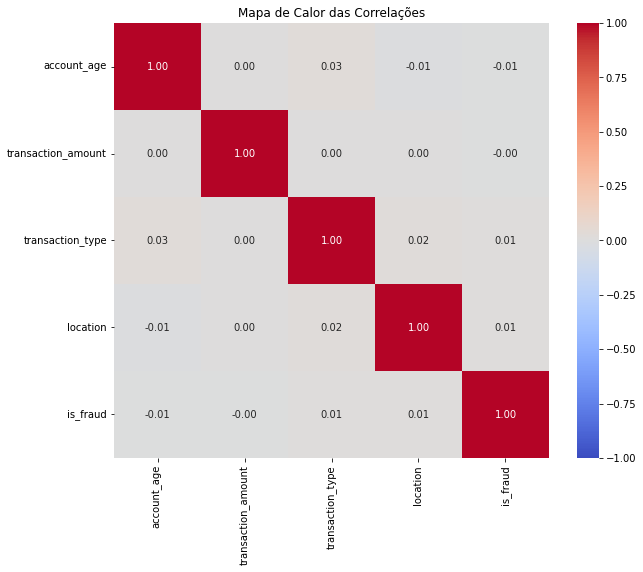

In [34]:
# Visualizando Correlações através de um Mapa de Calor

# Criando o heatmap
corr_matrix = dados.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))  # Define o tamanho da figura
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)
plt.title('Mapa de Calor das Correlações')
plt.show()

### Conclusão
- As variáveis no conjunto de dados não têm correlações fortes entre si, indicando que cada variável traz informações independentes para o modelo. Isso é desejável em muitos cenários de machine learning, pois reduz a chance de multicolinearidade, onde variáveis fortemente correlacionadas podem afetar negativamente a performance do modelo.

- Para a detecção de fraudes, a baixa correlação das variáveis com "is_fraud" sugere que não há uma única variável dominante para prever fraudes, e uma abordagem mais complexa pode ser necessária para identificar padrões de fraude.

### Verificando Correlação Individualmente

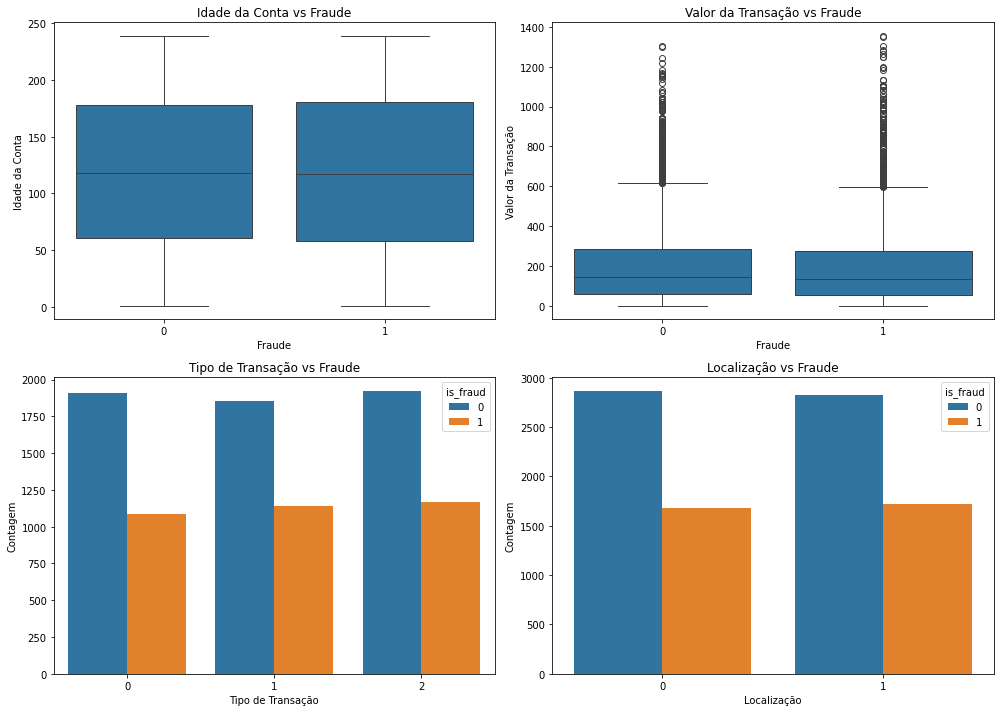

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o tamanho da figura
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico de dispersão para 'account_age' vs 'is_fraud'
sns.boxplot(x='is_fraud', y='account_age', data=dados, ax=axes[0, 0])
axes[0, 0].set_title('Idade da Conta vs Fraude')
axes[0, 0].set_xlabel('Fraude')
axes[0, 0].set_ylabel('Idade da Conta')

# Gráfico de dispersão para 'transaction_amount' vs 'is_fraud'
sns.boxplot(x='is_fraud', y='transaction_amount', data=dados, ax=axes[0, 1])
axes[0, 1].set_title('Valor da Transação vs Fraude')
axes[0, 1].set_xlabel('Fraude')
axes[0, 1].set_ylabel('Valor da Transação')

# Gráfico de contagem para 'transaction_type' vs 'is_fraud'
sns.countplot(x='transaction_type', hue='is_fraud', data=dados, ax=axes[1, 0])
axes[1, 0].set_title('Tipo de Transação vs Fraude')
axes[1, 0].set_xlabel('Tipo de Transação')
axes[1, 0].set_ylabel('Contagem')

# Gráfico de contagem para 'location' vs 'is_fraud'
sns.countplot(x='location', hue='is_fraud', data=dados, ax=axes[1, 1])
axes[1, 1].set_title('Localização vs Fraude')
axes[1, 1].set_xlabel('Localização')
axes[1, 1].set_ylabel('Contagem')

# Ajustando layout
plt.tight_layout()
plt.show()

#### Conclusão

- Os gráficos mostram que **não há uma diferença substancial na distribuição de fraudes em relação à idade da conta, valor da transação, tipo de transação ou localização**. Isso sugere que a fraude pode ser influenciada por uma combinação mais complexa de fatores e não por uma única variável.

<br><br>

# Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

<br><br>


## Dividindo os dados em Dados de Treino e Dados de Teste
- Nós **treinamos** o modelo com **dados de treino** e **avaliamos** o modelo com **dados de teste**.

In [36]:
# Cria um objeto separado para a variável alvo
y = dados.is_fraud

# Cria um objeto separado para as variáveis de entrada
X = dados.drop('is_fraud', axis=1)

# Split em dados de treino e teste sem amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, 
                                                        y, 
                                                        test_size=0.2, 
                                                        random_state=1234)

# Print do shape
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(7267, 4) (1817, 4) (7267,) (1817,)


<br>

### Balanceamento de Classes

- Realizar o balanceamento da variável alvo 'is_fraud'

In [37]:
dados['is_fraud'].value_counts()

is_fraud
0    5689
1    3395
Name: count, dtype: int64

#### Justificativa para Escolha da Técnica de Oversampling

- Para o seu projeto de classificação de fraudes em transações bancárias, recomendo utilizar a técnica de Oversampling com SMOTE. A razão principal é que a detecção de fraudes é uma tarefa crítica, onde a perda de informações (que pode ocorrer com o Undersampling) é altamente indesejável. As fraudes são eventos raros, e cada registro de fraude pode conter informações valiosas que ajudam o modelo a identificar padrões fraudulentos. Além disso:

<br>

#### Aplicando a Técnica de Oversampling

In [38]:
# Vamos aplicar a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors=5, random_state=42)

# Aplica o oversampling (deve ser feito somente com dados de treino)
X_res, y_res = over_sampler.fit_resample(X_treino, y_treino)

In [39]:
print(y_treino.value_counts())
print(X_treino.shape)
print(y_treino.shape)

print('\n==================================================\n')

# Ajusta o nome do dataset de treino para X
X_treino = X_res
# Ajusta o nome do dataset de treino para y
y_treino = y_res

print(y_treino.value_counts())
print(X_treino.shape)
print(y_treino.shape)

is_fraud
0    4565
1    2702
Name: count, dtype: int64
(7267, 4)
(7267,)


is_fraud
0    4565
1    4565
Name: count, dtype: int64
(9130, 4)
(9130,)


<br>

### Aplicando Técnica de Padronização

- Aplicaremos a técnica somente nas variáveis 'account_age' e 'transaction_amount'.
- As demais variáveis são do tipo categóricas transformadas em numéricas.

In [40]:
# Visulizando os Dados
X_treino.head(3)

,account_age,transaction_amount,transaction_type,location
0,151.0,9.521033,2,1
1,212.0,189.478493,2,0
2,24.0,87.407452,1,1


In [41]:
# Visualizando o Describe
display(X_treino.head(3))
display(X_treino.describe())

# Inicializa o scaler
scaler = StandardScaler()

# Copia as variáveis categóricas transformadas (não precisam de padronização)
X_treino_categorico = X_treino[['transaction_type', 'location']].copy()
X_teste_categorico = X_teste[['transaction_type', 'location']].copy()

# Aplica o scaler apenas nas variáveis contínuas dos dados de treino
X_treino_continuo = scaler.fit_transform(X_treino[['account_age', 'transaction_amount']])

# Usa a mesma transformação para os dados de teste
X_teste_continuo = scaler.transform(X_teste[['account_age', 'transaction_amount']])

# Converte de volta para DataFrame
X_treino_continuo = pd.DataFrame(X_treino_continuo, columns=['account_age', 'transaction_amount'])
X_teste_continuo = pd.DataFrame(X_teste_continuo, columns=['account_age', 'transaction_amount'])

# Combina as variáveis contínuas padronizadas com as variáveis categóricas transformadas
X_treino_scaled = pd.concat([X_treino_continuo, X_treino_categorico.reset_index(drop=True)], axis=1)
X_teste_scaled = pd.concat([X_teste_continuo, X_teste_categorico.reset_index(drop=True)], axis=1)

# Ajusta o nome do dataset de treino para X
X_treino = X_treino_scaled
# Ajusta o nome do dataset de treino para y
X_teste = X_teste_scaled

print('\n==================================================\n')

# Visualizando o Describe
display(X_treino.head(3))
display(X_treino.describe())

,account_age,transaction_amount,transaction_type,location
0,151.0,9.521033,2,1
1,212.0,189.478493,2,0
2,24.0,87.407452,1,1


,account_age,transaction_amount,transaction_type,location
count,9130.000000,9130.000000,9130.000000,9130.000000
mean,118.656350,198.946404,0.950164,0.448193
std,69.394601,196.824819,0.802581,0.497336
min,1.000000,0.004513,0.000000,0.000000
25%,58.624891,58.602839,0.000000,0.000000
50%,117.193230,136.616768,1.000000,0.000000
75%,179.421800,273.733080,2.000000,1.000000
max,239.000000,1355.685459,2.000000,1.000000


,account_age,transaction_amount,transaction_type,location
0,0.466109,-0.962459,2,1
1,1.345188,-0.048106,2,0
2,-1.364105,-0.566723,1,1


,account_age,transaction_amount,transaction_type,location
count,9.130000e+03,9.130000e+03,9130.000000,9130.000000
mean,1.343455e-16,-3.852340e-17,0.950164,0.448193
std,1.000055e+00,1.000055e+00,0.802581,0.497336
min,-1.695561e+00,-1.010811e+00,0.000000,0.000000
25%,-8.651213e-01,-7.130770e-01,0.000000,0.000000
50%,-2.108521e-02,-3.166930e-01,1.000000,0.000000
75%,8.756989e-01,3.799865e-01,2.000000,1.000000
max,1.734288e+00,5.877320e+00,2.000000,1.000000


<br><br><br><br>

<span style="color: green; font-size: 40px; font-weight: bold;">Construindo Modelos de Machine Learning</span>
### Nesta etapa do projeto, desenvolveremos e avaliaremos <u>cinco diferentes</u> modelos de machine learning para identificar qual deles apresenta o <u>melhor desempenho</u> para o nosso conjunto de dados.
    
#### Cada modelo foi escolhido por suas características únicas e capacidade de lidar com problemas de classificação.<br>

Abaixo estão os modelos que serão implementados e testados:
    
- **Modelo 1: Regressão Logística** - Utilizado como benchmark devido à sua simplicidade e eficácia em problemas de classificação binária. Este modelo ajudará a estabelecer uma linha base para a performance que esperamos superar com técnicas mais complexas.<br><br>
- **Modelo 2: Random Forest** - Um modelo de ensemble que usa múltiplas árvores de decisão para melhorar a generalização. É conhecido por sua alta precisão e capacidade de ranquear a importância das variáveis.<br><br>
- **Modelo 3: KNN (K-Nearest Neighbors)** - Um modelo baseado em instância que faz previsões com base nas labels das amostras mais próximas no espaço de características. Este modelo é eficaz em casos onde a relação entre as variáveis é altamente não-linear.<br><br>
- **Modelo 4: Decision Tree (Árvore de Decisão)** - Uma árvore de decisão é útil por sua interpretabilidade, permitindo entender claramente quais critérios o modelo está usando para tomar decisões.<br><br>
- **Modelo 5: SVM (Support Vector Machine)** - Ideal para problemas de classificação e regressão de margem grande. O SVM é eficiente na criação de hiperplanos em um espaço multidimensional, o que o torna adequado para casos com muitas variáveis de entrada.<br><br>
- **Modelo 6: Gradient Boosting Machine (GBM)** - Um modelo de ensemble que combina múltiplas árvores de decisão, onde cada nova árvore corrige os erros das anteriores. GBM é conhecido por sua alta precisão e flexibilidade, capaz de lidar com problemas complexos de classificação e regressão.<br><br>
- **Modelo 7: AdaBoost** - Um método de ensemble que ajusta iterativamente um modelo simples, como uma árvore de decisão rasa, dando maior peso às amostras que foram classificadas incorretamente nas iterações anteriores. É eficaz em melhorar a precisão de modelos de base fraca.<br><br>
- **Modelo 8: LightGBM** - Uma implementação de Gradient Boosting que utiliza técnicas avançadas como o histogram-based learning e o Leaf-wise growth. LightGBM é conhecido por sua alta eficiência e velocidade, especialmente em conjuntos de dados grandes.<br><br>
- **Modelo 9: XGBoost** - Uma poderosa biblioteca de boosting que é amplamente utilizada em competições de machine learning. XGBoost implementa otimizações avançadas e regularizações que ajudam a evitar overfitting, tornando-o robusto e eficiente para uma variedade de problemas de classificação e regressão.<br><br>
- **Modelo 10: Naive Bayes** - Um algoritmo probabilístico baseado no teorema de Bayes, assumindo a independência entre as características. É particularmente eficaz para problemas de classificação de texto e outras tarefas com grandes dimensões.<br><br>
- **Modelo 11: Neural Networks (Redes Neurais)** - Redes neurais são modelos inspirados no funcionamento do cérebro humano e são capazes de capturar padrões complexos e não-lineares. Eles são especialmente eficazes para grandes volumes de dados e problemas onde a relação entre variáveis é altamente complexa.<br><br>
- **Modelo 12: CatBoost)** - Uma biblioteca de gradient boosting desenvolvida pela Yandex. CatBoost é conhecido por lidar bem com variáveis categóricas, sem a necessidade de pré-processamento extensivo, e oferece boa precisão e velocidade.<br><br>
- **Modelo 13: Extra Trees (Extremely Randomized Trees)** - Uma variante do Random Forest que utiliza uma maior randomização na escolha dos splits. É geralmente mais rápido que Random Forest e pode resultar em modelos mais precisos.<br><br>
- **Modelo 15: Voting Classifier** - Um modelo ensemble que combina as previsões de vários modelos base (por exemplo, Random Forest, SVM, KNN) para melhorar a robustez e a precisão das previsões.<br><br>

Cada modelo será treinado utilizando o mesmo conjunto de dados, permitindo uma comparação justa de sua eficácia. A avaliação de cada modelo incluirá métricas como precisão, AUC-ROC, entre outras, dependendo das especificidades de nosso problema e dados.

<br><br>

## Criando <U>Dataframe</U> para salvar métricas de cada Modelo

In [42]:
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

<br><br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Modelo 1 - Regressão Logística (Benchmark)</span>

<br>

- Para a **primeira versão do modelo** o ideal é escolher um **algoritmo simples**, fácil de compreender e que será usado como Benchmark (**modelo base**).
- Cria várias modelos com o **GridSearchCV** com um **Pipeline** de **StandardScaler** e **LogisticRegression** para encontrar os **melhores hiperparâmetros**.
- Após a identificação do **melhor parâmetro**, o modelo final é treinado diretamente com a **LogisticRegression**, usando esses hiperparâmetros otimizados, para garantir um modelo eficiente e pronto para implementação prática.

<br>

### Criando o Modelo

In [43]:
# Configuração do pipeline de pré-processamento e modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),                    # Adiciona o escalonador
    ('logistic', LogisticRegression(max_iter=1000))  # Aumenta max_iter para garantir a convergência
])

# Define lista de hiperparâmetros
tuned_params_RL = {
    'logistic__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'logistic__penalty': ['l2']  # 'l1' está disponível apenas com o solucionador 'liblinear'
}

# Criando modelos com GridSearch
grid_search = GridSearchCV(pipeline, 
                         tuned_params_RL, 
                         scoring='roc_auc', 
                         n_jobs=-1)
grid_search.fit(X_treino, y_treino)

# Visualziando o melhor modelo
grid_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(C=10, max_iter=1000))])

#### Construindo e Treinando o Modelo com LogisticRegression

In [44]:
# Obtendo os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Criando o Modelo
modelo_RL = LogisticRegression(
    C=best_params['logistic__C'], 
    penalty='l2', 
    max_iter=1000
)

# Treinando o Modelo
modelo_RL.fit(X_treino, y_treino)

LogisticRegression(C=10, max_iter=1000)

<br><br>

## Previsão / Avaliação do Modelo

In [45]:
## Previsão / Avaliação do Modelo

## Previsões

# Previsões com dados de teste
y_pred_RL = modelo_RL.predict(X_teste)
print('Previsões de Classe:')
print(y_pred_RL[:5])
print('\n' + '-' * 80 + '\n')

# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_RL = modelo_RL.predict_proba(X_teste)
print('Previsões de Probabilidade para Cada Classe:')
print(y_pred_proba_RL[:5])
print('\n' + '-' * 80 + '\n')

# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva (Cálculo da Curva ROC)
y_pred_proba_RL_pos = modelo_RL.predict_proba(X_teste)[:, 1]
print('Previsões de Probabilidade para a Classe Positiva:')
print(y_pred_proba_RL_pos[:5])
print('\n' + '-' * 80 + '\n')

## Avaliação do Modelo

# Matriz de confusão
conf_matrix_RL = confusion_matrix(y_teste, y_pred_RL)
print('Matriz de Confusão:')
print(conf_matrix_RL)
print('\n' + '-' * 80 + '\n')

# Extraindo cada valor da Confusion Matrix
tn_RL, fp_RL, fn_RL, tp_RL = conf_matrix_RL.ravel()

# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_RL = roc_auc_score(y_teste, y_pred_proba_RL_pos)

# Calcula a curva ROC com dados e previsões em teste
fpr_RL, tpr_RL, thresholds_RL = roc_curve(y_teste, y_pred_proba_RL_pos)

# AUC em teste
auc_RL = auc(fpr_RL, tpr_RL)

# Acurácia em teste
acuracia_RL = accuracy_score(y_teste, y_pred_RL)

# Exibindo as métricas
print(f'Acurácia: {acuracia_RL:.4f}')
print(f'ROC AUC Score: {roc_auc_RL:.4f}')
print(f'AUC Score: {auc_RL:.4f}')

Previsões de Classe:
[1 0 1 0 0]

--------------------------------------------------------------------------------

Previsões de Probabilidade para Cada Classe:
[[0.49584488 0.50415512]
 [0.5158561  0.4841439 ]
 [0.42486796 0.57513204]
 [0.55360128 0.44639872]
 [0.59097805 0.40902195]]

--------------------------------------------------------------------------------

Previsões de Probabilidade para a Classe Positiva:
[0.50415512 0.4841439  0.57513204 0.44639872 0.40902195]

--------------------------------------------------------------------------------

Matriz de Confusão:
[[578 546]
 [354 339]]

--------------------------------------------------------------------------------

Acurácia: 0.5047
ROC AUC Score: 0.5022
AUC Score: 0.5022


<br>

#### Visualizando Importância das Variáveis

Visualizando Importância das Variáveis
--------------------------------------------------------------------------------
              Feature  Importance
3            location    0.382416
2    transaction_type    0.152437
1  transaction_amount    0.009702
0         account_age    0.005700
--------------------------------------------------------------------------------


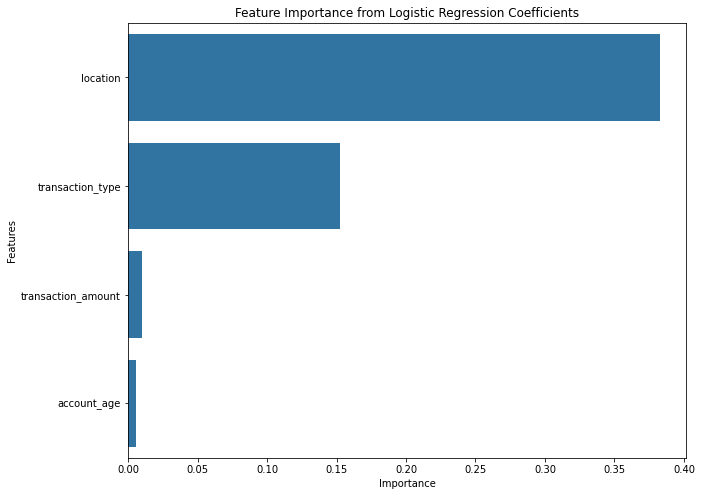

In [46]:
# Extrair coeficientes diretamente do modelo
coeficientes = modelo_RL.coef_[0]

# Calcular a importância como o valor absoluto dos coeficientes
importancias = np.abs(coeficientes)

# Criar DataFrame para visualização
features = X_treino.columns
df_importancias = pd.DataFrame({'Feature': features, 'Importance': importancias})
df_importancias = df_importancias.sort_values(by='Importance', ascending=False)

# Exibir importâncias
print('Visualizando Importância das Variáveis')
print(80 * '-')
print(df_importancias)
print(80 * '-')

# Gráfico de barras da importância das variáveis
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_importancias)
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

<br><br>

### Salvando as Métricas

In [47]:
modelo_RL = pd.DataFrame({
    'Nome do Modelo': ['Modelo 1'],
    'Nome do Algoritmo': ['Logistic Regression'],
    'ROC_AUC Score': [roc_auc_RL],
    'AUC Score': [auc_RL],
    'Acuracia': [acuracia_RL]    
})

df_modelos = pd.concat([df_modelos, modelo_RL], ignore_index=True)

# Verifica as métricas salvas
display(df_modelos)

,Nome do Modelo,Nome do Algoritmo,ROC_AUC Score,AUC Score,Acuracia
0,Modelo 1,Logistic Regression,0.502197,0.502197,0.504678


<br><br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Modelo 2 - Random Forest</span>

<br>

- Cria várias modelos com o **RandomizedSearchCV** para encontrar os **melhores hiperparâmetros**.
- Após a identificação do **melhor** modelo, o modelo final é treinado diretamente com a **RandomForestClassifier**, usando esses **hiperparâmetros** otimizados, para garantir um modelo eficiente e pronto para implementação prática.

<br>

### Criando o Modelo

In [48]:
# Grid de hiperparâmetros
tuned_params_v1_RF = {'n_estimators': [100, 200, 300, 400, 500], 
                      'min_samples_split': [2, 5, 10], 
                      'min_samples_leaf': [1, 2, 4]}

# Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros
modelo = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v1_RF, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)

# Treina o modelo
modelo.fit(X_treino, y_treino)

# Extrai o melhor modelo
best_rf = modelo.best_estimator_

# Imprime os detalhes do melhor modelo, incluindo o número de n_estimators
print(best_rf)

RandomForestClassifier(n_estimators=400)


#### Construindo e Treinando o Modelo com RandomForestClassifier

In [49]:
# Extraindo melhores parâmetros
best_params = best_rf.get_params()

# Recria o modelo com os melhores hiperparâmetros
modelo_RF = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    bootstrap=best_params['bootstrap']
)

# Treinando o modelo final no conjunto de treino
modelo_RF.fit(X_treino, y_treino)

RandomForestClassifier(n_estimators=400)

<br><br>

## Previsão / Avaliação do Modelo

In [50]:
## Previsões

# Previsões com dados de teste
y_pred_RF = modelo_RF.predict(X_teste)
print('Previsões de Classe:')
print(y_pred_RF[:5])
print('\n' + '-' * 80 + '\n')

# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_RF = modelo_RF.predict_proba(X_teste)
print('Previsões de Probabilidade para Cada Classe:')
print(y_pred_proba_RF[:5])
print('\n' + '-' * 80 + '\n')

# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva (Cálculo da Curva ROC)
y_pred_proba_RF_pos = modelo_RF.predict_proba(X_teste)[:, 1]
print('Previsões de Probabilidade para a Classe Positiva:')
print(y_pred_proba_RF_pos[:5])
print('\n' + '-' * 80 + '\n')

## Avaliação do Modelo

# Matriz de confusão
conf_matrix_RF = confusion_matrix(y_teste, y_pred_RF)
print('Matriz de Confusão:')
print(conf_matrix_RF)
print('\n' + '-' * 80 + '\n')

# Extraindo cada valor da Confusion Matrix
tn_RF, fp_RF, fn_RF, tp_RF = conf_matrix_RF.ravel()

# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_RF = roc_auc_score(y_teste, y_pred_proba_RF_pos)

# Calcula a curva ROC com dados e previsões em teste
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_teste, y_pred_proba_RF_pos)

# AUC em teste
auc_RF = auc(fpr_RF, tpr_RF)

# Acurácia em teste
acuracia_RF = accuracy_score(y_teste, y_pred_RF)

# Exibindo as métricas
print(f'Acurácia: {acuracia_RF:.4f}')
print(f'ROC AUC Score: {roc_auc_RF:.4f}')
print(f'AUC Score: {auc_RF:.4f}')

Previsões de Classe:
[1 0 1 1 0]

--------------------------------------------------------------------------------

Previsões de Probabilidade para Cada Classe:
[[0.3825 0.6175]
 [0.6375 0.3625]
 [0.42   0.58  ]
 [0.285  0.715 ]
 [0.9    0.1   ]]

--------------------------------------------------------------------------------

Previsões de Probabilidade para a Classe Positiva:
[0.6175 0.3625 0.58   0.715  0.1   ]

--------------------------------------------------------------------------------

Matriz de Confusão:
[[706 418]
 [417 276]]

--------------------------------------------------------------------------------

Acurácia: 0.5405
ROC AUC Score: 0.5168
AUC Score: 0.5168


<br>

#### Visualizando Importância das Variáveis

Visualizando Importância das Variáveis
--------------------------------------------------------------------------------
              Feature  Importance
1  transaction_amount    0.541193
0         account_age    0.428438
2    transaction_type    0.018912
3            location    0.011457
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


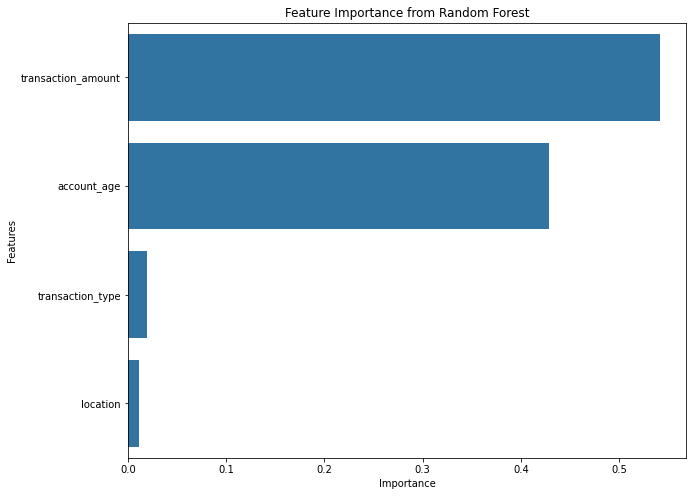

In [51]:
# Extrair coeficientes do modelo
importancias = modelo_RF.feature_importances_

# Criar DataFrame para visualização
features = X_treino.columns
df_importancias = pd.DataFrame({'Feature': features, 'Importance': importancias})
df_importancias = df_importancias.sort_values(by='Importance', ascending=False)

# Exibir importâncias
print('Visualizando Importância das Variáveis')
print(80*'-')
print(df_importancias)

print(80*'-')
print(80*'-')

# Gráfico de barras da importância das variáveis
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_importancias)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

<br><br>

### Salvando as Métricas

In [52]:
# Salvando as Métricas
dict_modelo_RF = {
    'Nome do Modelo': 'Modelo 2', 
    'Nome do Algoritmo': 'Random Forest', 
    'ROC_AUC Score': roc_auc_RF,
    'AUC Score': auc_RF,
    'Acuracia': acuracia_RF
}
# Adicionando as métricas ao DataFrame existente
df_modelos = pd.concat([df_modelos, pd.DataFrame([dict_modelo_RF])], ignore_index=True)

# Verifica as métricas salvas
display(df_modelos)

,Nome do Modelo,Nome do Algoritmo,ROC_AUC Score,AUC Score,Acuracia
0,Modelo 1,Logistic Regression,0.502197,0.502197,0.504678
1,Modelo 2,Random Forest,0.516768,0.516768,0.540451


<br><br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Modelo 3 - KNN</span>

<br>

- Para esse algoritmo precisamos antes definir o **valor de K**, que é o **número de vizinhos mais próximos**.
- Com o algoritmo KNN **não extraímos as variáveis mais importantes**, pois o conceito do algoritmo é diferente.

<br>

### Criando o Modelo

In [53]:
# Lista de possíveis valores de K
vizinhos = list(range(1, 20, 2))

# Lista para os scores
cv_scores = []

# Validação cruzada para determinar o melhor valor de k
for k in vizinhos:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_treino, y_treino, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())  
    
# Ajustando o erro de classificação
erro = [1 - x for x in cv_scores]

# Determinando o melhor valor de k (com menor erro)
optimal_k = vizinhos[erro.index(min(erro))]
print('O valor ideal de k é %d' % optimal_k)

O valor ideal de k é 1


#### Construindo e Treinando o Modelo

In [54]:
# Criamos o modelo versão 3
modelo_KNN = KNeighborsClassifier(n_neighbors=optimal_k)

# Treinando o modelo
modelo_KNN.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=1)

<br><br>

## Previsão / Avaliação do Modelo

In [55]:
## Previsões

# Previsões com dados de teste
y_pred_KNN = modelo_KNN.predict(X_teste)
print('Previsões de Classe:')
print(y_pred_KNN[:5])
print('\n' + '-' * 80 + '\n')

# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_KNN = modelo_KNN.predict_proba(X_teste)
print('Previsões de Probabilidade para Cada Classe:')
print(y_pred_proba_KNN[:5])
print('\n' + '-' * 80 + '\n')

# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva (Cálculo da Curva ROC)
y_pred_proba_KNN_pos = modelo_KNN.predict_proba(X_teste)[:, 1]
print('Previsões de Probabilidade para a Classe Positiva:')
print(y_pred_proba_KNN_pos[:5])
print('\n' + '-' * 80 + '\n')

## Avaliação do Modelo

# Matriz de confusão
conf_matrix_KNN = confusion_matrix(y_teste, y_pred_KNN)
print('Matriz de Confusão:')
print(conf_matrix_KNN)
print('\n' + '-' * 80 + '\n')

# Extraindo cada valor da Confusion Matrix
tn_KNN, fp_KNN, fn_KNN, tp_KNN = conf_matrix_KNN.ravel()

# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_KNN = roc_auc_score(y_teste, y_pred_proba_KNN_pos)

# Calcula a curva ROC com dados e previsões em teste
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_teste, y_pred_proba_KNN_pos)

# AUC em teste
auc_KNN = auc(fpr_KNN, tpr_KNN)

# Acurácia em teste
acuracia_KNN = accuracy_score(y_teste, y_pred_KNN)

# Exibindo as métricas
print(f'Acurácia: {acuracia_KNN:.4f}')
print(f'ROC AUC Score: {roc_auc_KNN:.4f}')
print(f'AUC Score: {auc_KNN:.4f}')

Previsões de Classe:
[1 0 1 1 0]

--------------------------------------------------------------------------------

Previsões de Probabilidade para Cada Classe:
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]

--------------------------------------------------------------------------------

Previsões de Probabilidade para a Classe Positiva:
[1. 0. 1. 1. 0.]

--------------------------------------------------------------------------------

Matriz de Confusão:
[[643 481]
 [396 297]]

--------------------------------------------------------------------------------

Acurácia: 0.5173
ROC AUC Score: 0.5003
AUC Score: 0.5003


<br><br>

### Salvando as Métricas

In [56]:
# Salvando as Métricas
dict_modelo_KNN = {
    'Nome do Modelo': 'Modelo 3', 
    'Nome do Algoritmo': 'K-Nearest Neighbors', 
    'ROC_AUC Score': roc_auc_KNN,
    'AUC Score': auc_KNN,
    'Acuracia': acuracia_KNN
}

# Adicionando as métricas ao DataFrame existente
df_modelos = pd.concat([df_modelos, pd.DataFrame([dict_modelo_KNN])], ignore_index=True)

# Verifica as métricas salvas
display(df_modelos)

,Nome do Modelo,Nome do Algoritmo,ROC_AUC Score,AUC Score,Acuracia
0,Modelo 1,Logistic Regression,0.502197,0.502197,0.504678
1,Modelo 2,Random Forest,0.516768,0.516768,0.540451
2,Modelo 3,K-Nearest Neighbors,0.500318,0.500318,0.517336


<br><br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Modelo 4 - Decision Tree</span>

<br>

- Cria várias modelos com o **RandomizedSearchCV** para encontrar os **melhores hiperparâmetros**.
- Após a identificação do **melhor modelo**, o modelo final é treinado diretamente com a **DecisionTreeClassifier**, usando esses hiperparâmetros otimizados, para garantir um modelo eficiente e pronto para implementação prática.

<br>

### Criando o Modelo

In [57]:
# Hiperparâmetros
tuned_params_DT = {
    'min_samples_split': [2, 3, 4, 5, 7], 
    'min_samples_leaf': [1, 2, 3, 4, 6], 
    'max_depth': [2, 3, 4, 5, 6, 7]
}

# Cria o modelo com RandomizedSearchCV
modelo = RandomizedSearchCV(DecisionTreeClassifier(), 
                            tuned_params_DT, 
                            n_iter=15, 
                            scoring='roc_auc', 
                            n_jobs=-1)

# Treinamento
modelo.fit(X_treino, y_treino)

# Visualiza o melhor modelo
best_dt = modelo.best_estimator_
print(best_dt)

DecisionTreeClassifier(max_depth=7)


#### Construindo e Treinando o Modelo com DecisionTreeClassifier

In [58]:
# Recriando o modelo com os melhores hiperparâmetros automaticamente
best_params = best_dt.get_params()

# Treinando o modelo final no conjunto de treino
modelo_DT = DecisionTreeClassifier(**best_params)
modelo_DT.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=7)

<br><br>

## Previsão / Avaliação do Modelo

In [59]:
## Previsões

# Previsões com dados de teste
y_pred_DT = modelo_DT.predict(X_teste)
print('Previsões de Classe:')
print(y_pred_DT[:5])
print('\n' + '-' * 80 + '\n')

# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_DT = modelo_DT.predict_proba(X_teste)
print('Previsões de Probabilidade para Cada Classe:')
print(y_pred_proba_DT[:5])
print('\n' + '-' * 80 + '\n')

# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva (Cálculo da Curva ROC)
y_pred_proba_DT_pos = modelo_DT.predict_proba(X_teste)[:, 1]
print('Previsões de Probabilidade para a Classe Positiva:')
print(y_pred_proba_DT_pos[:5])
print('\n' + '-' * 80 + '\n')

## Avaliação do Modelo

# Matriz de confusão
conf_matrix_DT = confusion_matrix(y_teste, y_pred_DT)
print('Matriz de Confusão:')
print(conf_matrix_DT)
print('\n' + '-' * 80 + '\n')

# Extraindo cada valor da Confusion Matrix
tn_DT, fp_DT, fn_DT, tp_DT = conf_matrix_DT.ravel()

# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_DT = roc_auc_score(y_teste, y_pred_proba_DT_pos)

# Calcula a curva ROC com dados e previsões em teste
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_teste, y_pred_proba_DT_pos)

# AUC em teste
auc_DT = auc(fpr_DT, tpr_DT)

# Acurácia em teste
acuracia_DT = accuracy_score(y_teste, y_pred_DT)

# Exibindo as métricas
print(f'Acurácia: {acuracia_DT:.4f}')
print(f'ROC AUC Score: {roc_auc_DT:.4f}')
print(f'AUC Score: {auc_DT:.4f}')

Previsões de Classe:
[0 0 0 0 0]

--------------------------------------------------------------------------------

Previsões de Probabilidade para Cada Classe:
[[0.56619718 0.43380282]
 [0.55480769 0.44519231]
 [0.56807512 0.43192488]
 [0.55480769 0.44519231]
 [0.55828221 0.44171779]]

--------------------------------------------------------------------------------

Previsões de Probabilidade para a Classe Positiva:
[0.43380282 0.44519231 0.43192488 0.44519231 0.44171779]

--------------------------------------------------------------------------------

Matriz de Confusão:
[[668 456]
 [414 279]]

--------------------------------------------------------------------------------

Acurácia: 0.5212
ROC AUC Score: 0.5006
AUC Score: 0.5006


<br>

#### Visualizando Importância das Variáveis

Visualizando Importância das Variáveis
--------------------------------------------------------------------------------
              Feature  Importance
1  transaction_amount    0.396403
0         account_age    0.364479
3            location    0.129452
2    transaction_type    0.109666
--------------------------------------------------------------------------------


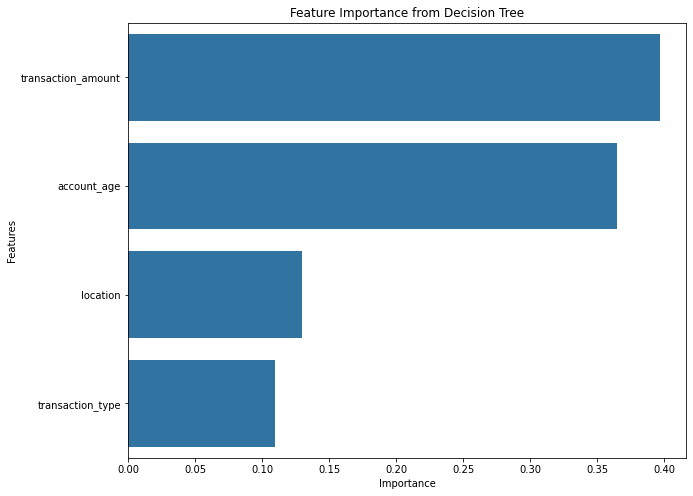

In [60]:
# Extrair coeficientes do modelo
importancias = modelo_DT.feature_importances_

# Criar DataFrame para visualização
features = X_treino.columns
df_importancias = pd.DataFrame({'Feature': features, 'Importance': importancias})
df_importancias = df_importancias.sort_values(by='Importance', ascending=False)

# Exibir importâncias
print('Visualizando Importância das Variáveis')
print(80*'-')
print(df_importancias.head())
print(80*'-')

# Gráfico de barras da importância das variáveis
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_importancias)
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

<br><br>

### Salvando as Métricas

In [61]:
# Salvando as Métricas
dict_modelo_DT = {
    'Nome do Modelo': 'Modelo 4', 
    'Nome do Algoritmo': 'Decision Tree', 
    'ROC_AUC Score': roc_auc_DT,
    'AUC Score': auc_DT,
    'Acuracia': acuracia_DT
}

# Adicionando as métricas ao DataFrame existente
df_modelos = pd.concat([df_modelos, pd.DataFrame([dict_modelo_DT])], ignore_index=True)

# Verifica as métricas salvas
display(df_modelos)

,Nome do Modelo,Nome do Algoritmo,ROC_AUC Score,AUC Score,Acuracia
0,Modelo 1,Logistic Regression,0.502197,0.502197,0.504678
1,Modelo 2,Random Forest,0.516768,0.516768,0.540451
2,Modelo 3,K-Nearest Neighbors,0.500318,0.500318,0.517336
3,Modelo 4,Decision Tree,0.500585,0.500585,0.521189


<br><br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Modelo 5 - SVM</span>

<br>

- Para a construção deste modelo, utilizamos o algoritmo Support Vector Machine (SVM) com a função kernel radial (RBF).
- A seleção de hiperparâmetros será realizada utilizando GridSearchCV para encontrar a melhor combinação de parâmetros para o nosso modelo.
- Após a identificação dos melhores hiperparâmetros, treinaremos o modelo final com esses valores otimizados para garantir um desempenho eficiente e pronto para implementação prática.

<br>

### Criando o Modelo

In [62]:
# Função para seleção de hiperparâmetros
#def svc_param_selection(X, y, nfolds):
#    Cs = [0.001, 0.01, 0.1, 1, 10]
#    gammas = [0.001, 0.01, 0.1, 1]
#    param_grid = {'C': Cs, 'gamma': gammas}
#    grid_search = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=nfolds)
#    grid_search.fit(X, y)
#    return grid_search.best_params_

# Aplica a função para obter os melhores hiperparâmetros
# best_params_SVM = svc_param_selection(X_treino, y_treino, 5)
# print(best_params_SVM)


#### USANDO RandomizedSearchCV (Mais rápido)

# Função para seleção de hiperparâmetros usando RandomizedSearchCV
def svc_param_selection(X, y, n_iter, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma': gammas}
    random_search = RandomizedSearchCV(SVC(kernel='rbf', probability=True), param_distributions=param_grid, n_iter=n_iter, cv=nfolds, random_state=42, n_jobs=-1)
    random_search.fit(X, y)
    return random_search.best_params_

# Aplica a função para obter os melhores hiperparâmetros com um número limitado de iterações (10)
best_params_SVM = svc_param_selection(X_treino, y_treino, n_iter=10, nfolds=5)
print(best_params_SVM)

{'gamma': 1, 'C': 0.1}


#### Construindo e Treinando

In [63]:
# Cria o modelo com os melhores hiperparâmetros
modelo_SVM = SVC(**best_params_SVM, probability=True)

# Treinamento
modelo_SVM.fit(X_treino, y_treino)

SVC(C=0.1, gamma=1, probability=True)

<br><br>

## Previsão / Avaliação do Modelo

In [64]:
## Previsões

# Previsões com dados de teste
y_pred_SVM = modelo_SVM.predict(X_teste)
print('Previsões de Classe:')
print(y_pred_SVM[:5])
print('\n' + '-' * 80 + '\n')

# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_SVM = modelo_SVM.predict_proba(X_teste)
print('Previsões de Probabilidade para Cada Classe:')
print(y_pred_proba_SVM[:5])
print('\n' + '-' * 80 + '\n')

# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva (Cálculo da Curva ROC)
y_pred_proba_SVM_pos = modelo_SVM.predict_proba(X_teste)[:, 1]
print('Previsões de Probabilidade para a Classe Positiva:')
print(y_pred_proba_SVM_pos[:5])
print('\n' + '-' * 80 + '\n')

## Avaliação do Modelo

# Matriz de confusão
conf_matrix_SVM = confusion_matrix(y_teste, y_pred_SVM)
print('Matriz de Confusão:')
print(conf_matrix_SVM)
print('\n' + '-' * 80 + '\n')

# Extraindo cada valor da Confusion Matrix
tn_SVM, fp_SVM, fn_SVM, tp_SVM = conf_matrix_SVM.ravel()

# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_SVM = roc_auc_score(y_teste, y_pred_proba_SVM_pos)

# Calcula a curva ROC com dados e previsões em teste
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_teste, y_pred_proba_SVM_pos)

# AUC em teste
auc_SVM = auc(fpr_SVM, tpr_SVM)

# Acurácia em teste
acuracia_SVM = accuracy_score(y_teste, y_pred_SVM)

# Exibindo as métricas
print(f'Acurácia: {acuracia_SVM:.4f}')
print(f'ROC AUC Score: {roc_auc_SVM:.4f}')
print(f'AUC Score: {auc_SVM:.4f}')

Previsões de Classe:
[0 0 1 0 0]

--------------------------------------------------------------------------------

Previsões de Probabilidade para Cada Classe:
[[0.57558101 0.42441899]
 [0.54765457 0.45234543]
 [0.4411593  0.5588407 ]
 [0.5571691  0.4428309 ]
 [0.57578611 0.42421389]]

--------------------------------------------------------------------------------

Previsões de Probabilidade para a Classe Positiva:
[0.42441899 0.45234543 0.5588407  0.4428309  0.42421389]

--------------------------------------------------------------------------------

Matriz de Confusão:
[[647 477]
 [410 283]]

--------------------------------------------------------------------------------

Acurácia: 0.5118
ROC AUC Score: 0.5010
AUC Score: 0.5010


<br>

#### Visualizando Importância das Variáveis

Visualizando Importância das Variáveis para o Modelo SVM
--------------------------------------------------------------------------------
              Feature  Importance
1  transaction_amount   -0.005008
3            location   -0.006549
0         account_age   -0.007925
2    transaction_type   -0.014199
--------------------------------------------------------------------------------


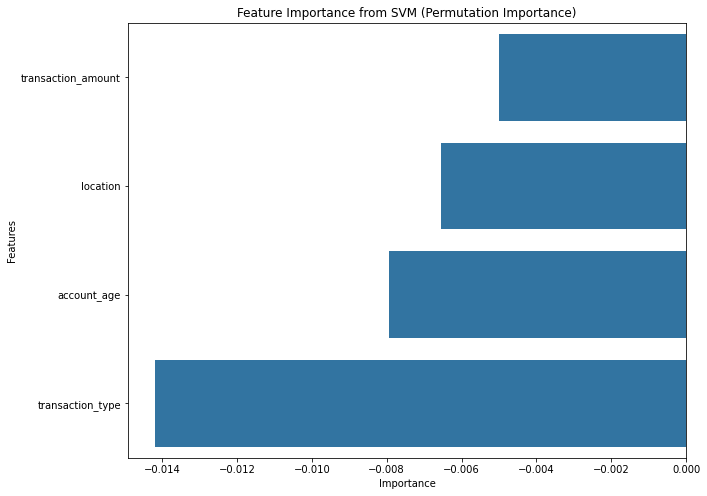

In [65]:
from sklearn.inspection import permutation_importance

# Avaliação da importância das variáveis através da permutação
result = permutation_importance(modelo_SVM, X_teste, y_teste, n_repeats=10, random_state=42, n_jobs=-1)

# Criando DataFrame para visualização
df_importancias_SVM = pd.DataFrame({'Feature': X_teste.columns, 'Importance': result.importances_mean})
df_importancias_SVM = df_importancias_SVM.sort_values(by='Importance', ascending=False)

# Exibindo as importâncias
print('Visualizando Importância das Variáveis para o Modelo SVM')
print(80 * '-')
print(df_importancias_SVM)
print(80 * '-')

# Gráfico de barras da importância das variáveis
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_importancias_SVM)
plt.title('Feature Importance from SVM (Permutation Importance)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

<br><br>

### Salvando as Métricas

In [66]:
# Salvando as Métricas
dict_modelo_SVM = {
    'Nome do Modelo': 'Modelo 5', 
    'Nome do Algoritmo': 'SVM', 
    'ROC_AUC Score': roc_auc_SVM,
    'AUC Score': auc_SVM,
    'Acuracia': acuracia_SVM
}

# Adicionando as métricas ao DataFrame existente
df_modelos = pd.concat([df_modelos, pd.DataFrame([dict_modelo_SVM])], ignore_index=True)

# Verifica as métricas salvas
display(df_modelos)

,Nome do Modelo,Nome do Algoritmo,ROC_AUC Score,AUC Score,Acuracia
0,Modelo 1,Logistic Regression,0.502197,0.502197,0.504678
1,Modelo 2,Random Forest,0.516768,0.516768,0.540451
2,Modelo 3,K-Nearest Neighbors,0.500318,0.500318,0.517336
3,Modelo 4,Decision Tree,0.500585,0.500585,0.521189
4,Modelo 5,SVM,0.500996,0.500996,0.511833


<br><br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Modelo 6 - Gradient Boosting Machine</span>

<br>

- Cria várias modelos com o RandomizedSearchCV para encontrar os melhores hiperparâmetros. Após a identificação do melhor modelo, o modelo final é treinado diretamente com o GradientBoostingClassifier, usando esses hiperparâmetros otimizados, para garantir um modelo eficiente e pronto para implementação prática.

<br>

### Criando o Modelo

In [67]:
# Hiperparâmetros
tuned_params_GBM = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Cria o modelo com RandomizedSearchCV
modelo = RandomizedSearchCV(GradientBoostingClassifier(), 
                            tuned_params_GBM, 
                            n_iter=15, 
                            scoring='roc_auc', 
                            n_jobs=-1)

# Treinamento
modelo.fit(X_treino, y_treino)

# Visualiza o melhor modelo
best_gbm = modelo.best_estimator_
print(best_gbm)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=2, n_estimators=300)


#### Construindo e Treinando o Modelo com GradientBoostingClassifier

In [68]:
# Recriando o modelo com os melhores hiperparâmetros automaticamente
best_params = best_gbm.get_params()

# Treinando o modelo final no conjunto de treino
modelo_GBM = GradientBoostingClassifier(**best_params)
modelo_GBM.fit(X_treino, y_treino)
print(modelo_GBM)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=2, n_estimators=300)


<br><br>

## Previsão / Avaliação do Modelo

In [69]:
## Previsões

# Previsões com dados de teste
y_pred_GBM = modelo_GBM.predict(X_teste)
print('Previsões de Classe:')
print(y_pred_GBM[:5])
print('\n' + '-' * 80 + '\n')

# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_GBM = modelo_GBM.predict_proba(X_teste)
print('Previsões de Probabilidade para Cada Classe:')
print(y_pred_proba_GBM[:5])
print('\n' + '-' * 80 + '\n')

# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva (Cálculo da Curva ROC)
y_pred_proba_GBM_pos = modelo_GBM.predict_proba(X_teste)[:, 1]
print('Previsões de Probabilidade para a Classe Positiva:')
print(y_pred_proba_GBM_pos[:5])
print('\n' + '-' * 80 + '\n')

## Avaliação do Modelo

# Matriz de confusão
conf_matrix_GBM = confusion_matrix(y_teste, y_pred_GBM)
print('Matriz de Confusão:')
print(conf_matrix_GBM)
print('\n' + '-' * 80 + '\n')

# Extraindo cada valor da Confusion Matrix
tn_GBM, fp_GBM, fn_GBM, tp_GBM = conf_matrix_GBM.ravel()

# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_GBM = roc_auc_score(y_teste, y_pred_proba_GBM_pos)

# Calcula a curva ROC com dados e previsões em teste
fpr_GBM, tpr_GBM, thresholds_GBM = roc_curve(y_teste, y_pred_proba_GBM_pos)

# AUC em teste
auc_GBM = auc(fpr_GBM, tpr_GBM)

# Acurácia em teste
acuracia_GBM = accuracy_score(y_teste, y_pred_GBM)

# Exibindo as métricas
print(f'Acurácia: {acuracia_GBM:.4f}')
print(f'ROC AUC Score: {roc_auc_GBM:.4f}')
print(f'AUC Score: {auc_GBM:.4f}')

Previsões de Classe:
[0 1 0 0 0]

--------------------------------------------------------------------------------

Previsões de Probabilidade para Cada Classe:
[[0.6205184  0.3794816 ]
 [0.32316818 0.67683182]
 [0.60124282 0.39875718]
 [0.54853374 0.45146626]
 [0.67878847 0.32121153]]

--------------------------------------------------------------------------------

Previsões de Probabilidade para a Classe Positiva:
[0.3794816  0.67683182 0.39875718 0.45146626 0.32121153]

--------------------------------------------------------------------------------

Matriz de Confusão:
[[688 436]
 [408 285]]

--------------------------------------------------------------------------------

Acurácia: 0.5355
ROC AUC Score: 0.5174
AUC Score: 0.5174


<br>

#### Visualizando Importância das Variáveis

Visualizando Importância das Variáveis
--------------------------------------------------------------------------------
              Feature  Importance
1  transaction_amount    0.503837
0         account_age    0.388774
2    transaction_type    0.061566
3            location    0.045823
--------------------------------------------------------------------------------


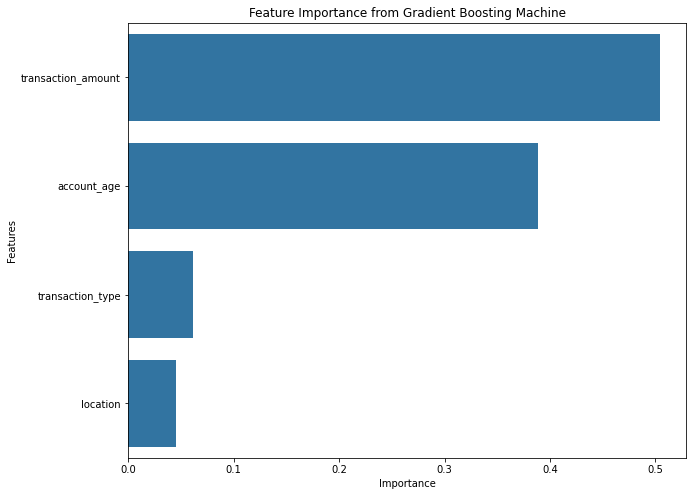

In [70]:
# Extrair coeficientes do modelo
importancias = modelo_GBM.feature_importances_

# Criar DataFrame para visualização
features = X_treino.columns
df_importancias = pd.DataFrame({'Feature': features, 'Importance': importancias})
df_importancias = df_importancias.sort_values(by='Importance', ascending=False)

# Exibir importâncias
print('Visualizando Importância das Variáveis')
print(80*'-')
print(df_importancias.head())
print(80*'-')

# Gráfico de barras da importância das variáveis
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_importancias)
plt.title('Feature Importance from Gradient Boosting Machine')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

<br><br>

### Salvando as Métricas

In [71]:
# Salvando as Métricas
dict_modelo_GBM = {
    'Nome do Modelo': 'Modelo 6', 
    'Nome do Algoritmo': 'Gradient Boosting Machine', 
    'ROC_AUC Score': roc_auc_GBM,
    'AUC Score': auc_GBM,
    'Acuracia': acuracia_GBM
}

# Adicionando as métricas ao DataFrame existente
df_modelos = pd.concat([df_modelos, pd.DataFrame([dict_modelo_GBM])], ignore_index=True)

# Verifica as métricas salvas
display(df_modelos)

,Nome do Modelo,Nome do Algoritmo,ROC_AUC Score,AUC Score,Acuracia
0,Modelo 1,Logistic Regression,0.502197,0.502197,0.504678
1,Modelo 2,Random Forest,0.516768,0.516768,0.540451
2,Modelo 3,K-Nearest Neighbors,0.500318,0.500318,0.517336
3,Modelo 4,Decision Tree,0.500585,0.500585,0.521189
4,Modelo 5,SVM,0.500996,0.500996,0.511833
5,Modelo 6,Gradient Boosting Machine,0.517419,0.517419,0.535498


<br><br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Modelo 7 - AdaBoost</span>

<br>

- Cria várias modelos com o RandomizedSearchCV para encontrar os melhores hiperparâmetros. Após a identificação do melhor modelo, o modelo final é treinado diretamente com o AdaBoostClassifier, usando esses hiperparâmetros otimizados, para garantir um modelo eficiente e pronto para implementação prática.

<br>

### Criando o Modelo

In [72]:
# Hiperparâmetros
tuned_params_AB = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]
}

# Cria o modelo com RandomizedSearchCV
modelo = RandomizedSearchCV(AdaBoostClassifier(), 
                            tuned_params_AB, 
                            n_iter=10, 
                            scoring='roc_auc', 
                            n_jobs=-1)

# Treinamento
modelo.fit(X_treino, y_treino)

# Visualiza o melhor modelo
best_ab = modelo.best_estimator_
print(best_ab)

AdaBoostClassifier(learning_rate=0.05, n_estimators=250)


#### Construindo e Treinando o Modelo com AdaBoostClassifier

In [73]:
# Recriando o modelo com os melhores hiperparâmetros automaticamente
best_params = best_ab.get_params()

# Treinando o modelo final no conjunto de treino
modelo_AB = AdaBoostClassifier(**best_params)
modelo_AB.fit(X_treino, y_treino)
print(modelo_AB)

AdaBoostClassifier(learning_rate=0.05, n_estimators=250)


<br><br>

## Previsão / Avaliação do Modelo

In [74]:
## Previsões

# Previsões com dados de teste
y_pred_AB = modelo_AB.predict(X_teste)
print('Previsões de Classe:')
print(y_pred_AB[:5])
print('\n' + '-' * 80 + '\n')

# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_AB = modelo_AB.predict_proba(X_teste)
print('Previsões de Probabilidade para Cada Classe:')
print(y_pred_proba_AB[:5])
print('\n' + '-' * 80 + '\n')

# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva (Cálculo da Curva ROC)
y_pred_proba_AB_pos = modelo_AB.predict_proba(X_teste)[:, 1]
print('Previsões de Probabilidade para a Classe Positiva:')
print(y_pred_proba_AB_pos[:5])
print('\n' + '-' * 80 + '\n')

## Avaliação do Modelo

# Matriz de confusão
conf_matrix_AB = confusion_matrix(y_teste, y_pred_AB)
print('Matriz de Confusão:')
print(conf_matrix_AB)
print('\n' + '-' * 80 + '\n')

# Extraindo cada valor da Confusion Matrix
tn_AB, fp_AB, fn_AB, tp_AB = conf_matrix_AB.ravel()

# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_AB = roc_auc_score(y_teste, y_pred_proba_AB_pos)

# Calcula a curva ROC com dados e previsões em teste
fpr_AB, tpr_AB, thresholds_AB = roc_curve(y_teste, y_pred_proba_AB_pos)

# AUC em teste
auc_AB = auc(fpr_AB, tpr_AB)

# Acurácia em teste
acuracia_AB = accuracy_score(y_teste, y_pred_AB)

# Exibindo as métricas
print(f'Acurácia: {acuracia_AB:.4f}')
print(f'ROC AUC Score: {roc_auc_AB:.4f}')
print(f'AUC Score: {auc_AB:.4f}')

Previsões de Classe:
[0 0 1 0 0]

--------------------------------------------------------------------------------

Previsões de Probabilidade para Cada Classe:
[[0.50240348 0.49759652]
 [0.50127338 0.49872662]
 [0.49590485 0.50409515]
 [0.50397724 0.49602276]
 [0.50759478 0.49240522]]

--------------------------------------------------------------------------------

Previsões de Probabilidade para a Classe Positiva:
[0.49759652 0.49872662 0.50409515 0.49602276 0.49240522]

--------------------------------------------------------------------------------

Matriz de Confusão:
[[653 471]
 [406 287]]

--------------------------------------------------------------------------------

Acurácia: 0.5173
ROC AUC Score: 0.5089
AUC Score: 0.5089


<br>

#### Visualizando Importância das Variáveis

Visualizando Importância das Variáveis
--------------------------------------------------------------------------------
              Feature  Importance
0         account_age       0.420
1  transaction_amount       0.284
3            location       0.152
2    transaction_type       0.144
--------------------------------------------------------------------------------


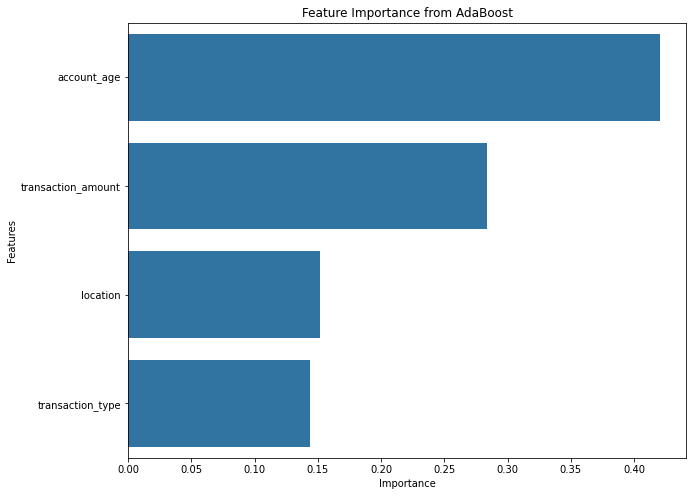

In [75]:
# Extrair coeficientes do modelo
importancias = modelo_AB.feature_importances_

# Criar DataFrame para visualização
features = X_treino.columns
df_importancias = pd.DataFrame({'Feature': features, 'Importance': importancias})
df_importancias = df_importancias.sort_values(by='Importance', ascending=False)

# Exibir importâncias
print('Visualizando Importância das Variáveis')
print(80*'-')
print(df_importancias.head())
print(80*'-')

# Gráfico de barras da importância das variáveis
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_importancias)
plt.title('Feature Importance from AdaBoost')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

<br><br>

### Salvando as Métricas

In [76]:
# Salvando as Métricas
dict_modelo_AB = {
    'Nome do Modelo': 'Modelo 7', 
    'Nome do Algoritmo': 'AdaBoost', 
    'ROC_AUC Score': roc_auc_AB,
    'AUC Score': auc_AB,
    'Acuracia': acuracia_AB
}

# Adicionando as métricas ao DataFrame existente
df_modelos = pd.concat([df_modelos, pd.DataFrame([dict_modelo_AB])], ignore_index=True)

# Verifica as métricas salvas
display(df_modelos)

,Nome do Modelo,Nome do Algoritmo,ROC_AUC Score,AUC Score,Acuracia
0,Modelo 1,Logistic Regression,0.502197,0.502197,0.504678
1,Modelo 2,Random Forest,0.516768,0.516768,0.540451
2,Modelo 3,K-Nearest Neighbors,0.500318,0.500318,0.517336
3,Modelo 4,Decision Tree,0.500585,0.500585,0.521189
4,Modelo 5,SVM,0.500996,0.500996,0.511833
5,Modelo 6,Gradient Boosting Machine,0.517419,0.517419,0.535498
6,Modelo 7,AdaBoost,0.508913,0.508913,0.517336


<br><br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Modelo 8 - LightGBM</span>

<br>

- Cria várias modelos com o RandomizedSearchCV para encontrar os melhores hiperparâmetros. Após a identificação do melhor modelo, o modelo final é treinado diretamente com o LGBMClassifier, usando esses hiperparâmetros otimizados, para garantir um modelo eficiente e pronto para implementação prática.

<br>

### Criando o Modelo

In [ ]:
# Hiperparâmetros
tuned_params_LGBM = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70],
    'min_child_samples': [20, 30, 40],
    'subsample': [0.6, 0.8, 1.0]
}

# Cria o modelo com RandomizedSearchCV
modelo = RandomizedSearchCV(LGBMClassifier(), 
                            tuned_params_LGBM, 
                            n_iter=10, 
                            scoring='roc_auc', 
                            n_jobs=-1)

# Treinamento
modelo.fit(X_treino, y_treino)

# Visualiza o melhor modelo
best_lgbm = modelo.best_estimator_
print(best_lgbm)

#### Construindo e Treinando o Modelo com LGBMClassifier

In [ ]:
# Recriando o modelo com os melhores hiperparâmetros automaticamente
best_params = best_lgbm.get_params()

# Treinando o modelo final no conjunto de treino
modelo_LGBM = LGBMClassifier(**best_params)
modelo_LGBM.fit(X_treino, y_treino)
print(modelo_LGBM)

<br><br>

## Previsão / Avaliação do Modelo

In [ ]:
## Previsões

# Previsões com dados de teste
y_pred_LGBM = modelo_LGBM.predict(X_teste)
print('Previsões de Classe:')
print(y_pred_LGBM[:5])
print('\n' + '-' * 80 + '\n')

# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_LGBM = modelo_LGBM.predict_proba(X_teste)
print('Previsões de Probabilidade para Cada Classe:')
print(y_pred_proba_LGBM[:5])
print('\n' + '-' * 80 + '\n')

# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva (Cálculo da Curva ROC)
y_pred_proba_LGBM_pos = modelo_LGBM.predict_proba(X_teste)[:, 1]
print('Previsões de Probabilidade para a Classe Positiva:')
print(y_pred_proba_LGBM_pos[:5])
print('\n' + '-' * 80 + '\n')

## Avaliação do Modelo

# Matriz de confusão
conf_matrix_LGBM = confusion_matrix(y_teste, y_pred_LGBM)
print('Matriz de Confusão:')
print(conf_matrix_LGBM)
print('\n' + '-' * 80 + '\n')

# Extraindo cada valor da Confusion Matrix
tn_LGBM, fp_LGBM, fn_LGBM, tp_LGBM = conf_matrix_LGBM.ravel()

# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_LGBM = roc_auc_score(y_teste, y_pred_proba_LGBM_pos)

# Calcula a curva ROC com dados e previsões em teste
fpr_LGBM, tpr_LGBM, thresholds_LGBM = roc_curve(y_teste, y_pred_proba_LGBM_pos)

# AUC em teste
auc_LGBM = auc(fpr_LGBM, tpr_LGBM)

# Acurácia em teste
acuracia_LGBM = accuracy_score(y_teste, y_pred_LGBM)

# Exibindo as métricas
print(f'Acurácia: {acuracia_LGBM:.4f}')
print(f'ROC AUC Score: {roc_auc_LGBM:.4f}')
print(f'AUC Score: {auc_LGBM:.4f}')


<br>

#### Visualizando Importância das Variáveis

In [ ]:
# Extrair coeficientes do modelo
importancias = modelo_LGBM.feature_importances_

# Criar DataFrame para visualização
features = X_treino.columns
df_importancias = pd.DataFrame({'Feature': features, 'Importance': importancias})
df_importancias = df_importancias.sort_values(by='Importance', ascending=False)

# Exibir importâncias
print('Visualizando Importância das Variáveis')
print(80*'-')
print(df_importancias.head())
print(80*'-')

# Gráfico de barras da importância das variáveis
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_importancias)
plt.title('Feature Importance from LightGBM')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


<br><br>

### Salvando as Métricas

In [ ]:
# Salvando as Métricas
dict_modelo_LGBM = {
    'Nome do Modelo': 'Modelo 8', 
    'Nome do Algoritmo': 'LightGBM', 
    'ROC_AUC Score': roc_auc_LGBM,
    'AUC Score': auc_LGBM,
    'Acuracia': acuracia_LGBM
}

# Adicionando as métricas ao DataFrame existente
df_modelos = pd.concat([df_modelos, pd.DataFrame([dict_modelo_LGBM])], ignore_index=True)

# Verifica as métricas salvas
display(df_modelos)


<br><br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Modelo 9 - XGBoost</span>

<br>

- 

<br>

### Criando o Modelo

#### Construindo e Treinando o Modelo com

<br><br>

## Previsão / Avaliação do Modelo

<br>

#### Visualizando Importância das Variáveis

<br><br>

### Salvando as Métricas

<br><br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Modelo 10 - </span>

<br>

- 

<br>

### Criando o Modelo

#### Construindo e Treinando o Modelo com

<br><br>

## Previsão / Avaliação do Modelo

<br>

#### Visualizando Importância das Variáveis

<br><br>

### Salvando as Métricas

<br><br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Modelo 11 - </span>

<br>

- 

<br>

### Criando o Modelo

#### Construindo e Treinando o Modelo com

<br><br>

## Previsão / Avaliação do Modelo

<br>

#### Visualizando Importância das Variáveis

<br><br>

### Salvando as Métricas

<br><br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Modelo 12 - </span>

<br>

- 

<br>

### Criando o Modelo

#### Construindo e Treinando o Modelo com

<br><br>

## Previsão / Avaliação do Modelo

<br>

#### Visualizando Importância das Variáveis

<br><br>

### Salvando as Métricas

<br><br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Modelo 13 - </span>

<br>

- 

<br>

### Criando o Modelo

#### Construindo e Treinando o Modelo com

<br><br>

## Previsão / Avaliação do Modelo

<br>

#### Visualizando Importância das Variáveis

<br><br>

### Salvando as Métricas

<br><br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Modelo 14 - </span>

<br>

- 

<br>

### Criando o Modelo

#### Construindo e Treinando o Modelo com

<br><br>

## Previsão / Avaliação do Modelo

<br>

#### Visualizando Importância das Variáveis

<br><br>

### Salvando as Métricas

## FIM